### Multi Cross :
        Linear Model x3 : KO
        MLP (2, 46, 46, 3): OK 1m alpha : 0.001

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from MyMLP.MyMLP import MyMLP

In [2]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

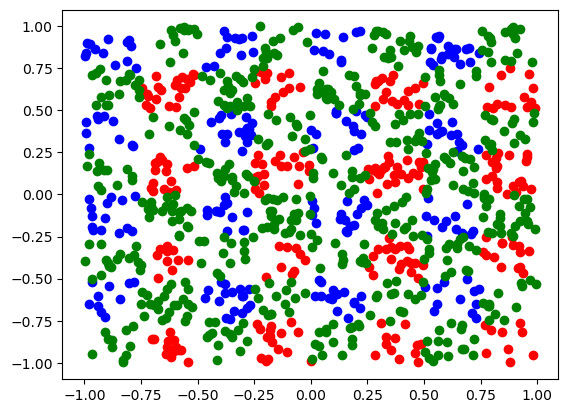

<Figure size 640x480 with 0 Axes>

In [3]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

In [4]:
my_mlp = MyMLP([2,46,46,3])

In [5]:
my_mlp.train(X , Y, is_classification=True, iteration_count=1000000, alpha=0.001)

predictions =[my_mlp.predict(x, is_classification=True) for x in X]
print(predictions)
accuracy = my_mlp.calculate_accuracy_multi_class(X,Y)
print(accuracy)


[[0.4611242420761488, 0.12427195321587904, 0.4718330598347304], [0.19192266674862765, 0.46158718631843304, 0.3813432579371092], [0.10217339105414745, 0.3836568459842243, 0.5692099443281794], [0.09426428857022268, 0.38099706242331516, 0.4384225689936544], [0.3483412107586414, 0.21999926567400258, 0.5025461761194268], [0.5462494250119938, -0.09736312770379191, 0.5886326132803283], [0.0029431159983958257, 0.16184803257081298, 0.7515126279060231], [0.07956906065515293, 0.42243827389462124, 0.5762542296070275], [0.3325348456001911, -0.04562250348474951, 0.8237360004555829], [0.5032341729100598, -0.02568565818452996, 0.5976348113464977], [0.3918499277820584, 0.14426146670988066, 0.5401174556966534], [0.3301084424465341, 0.23850187608110607, 0.5186747704016481], [0.3550776207493617, 0.2586622451178182, 0.37622425451469566], [-0.004074126561356469, 0.364512172804995, 0.5382742836178963], [0.3668370874256692, 0.18008652472957218, 0.5006998504373954], [0.535033787488583, -0.10750324153172548, 0.

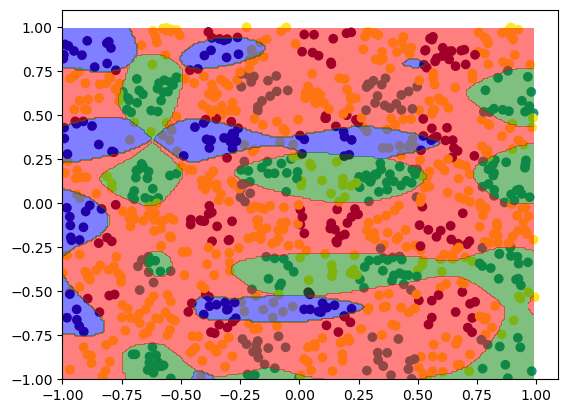

In [6]:
x_min, x_max = -1., 1.
y_min, y_max = -1., 1.
step = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
gridpoints = np.c_[xx.ravel(), yy.ravel()]

output_ptr =  [my_mlp.predict(x, is_classification=True) for x in gridpoints]
output_ptr = np.array(output_ptr)

plt.scatter(X[:, 0], X[:, 1], c=np.argmax(Y, axis=1))

contour = np.argmax(output_ptr, axis=1).reshape(xx.shape)
plt.contourf(xx, yy, contour, levels=[-np.inf, 0.5, 1.5, np.inf], colors=['blue', 'green', 'red'],
             alpha=0.5)

plt.show()

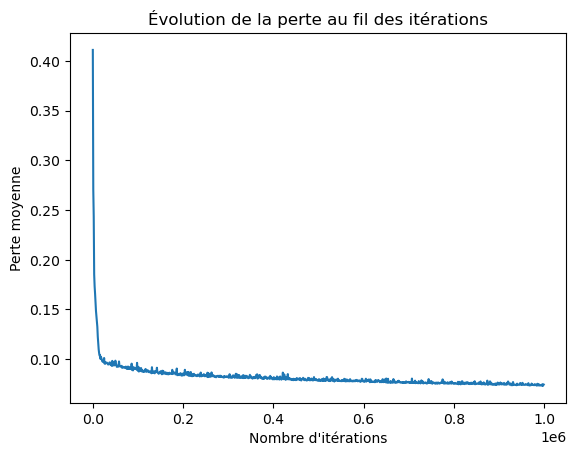

In [7]:
tab =(my_mlp.loss)
plt.plot(range(0, len(tab) * 1000, 1000), tab)  # Utilisez len(tab) pour déterminer la longueur correcte de l'axe x
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Perte moyenne')
plt.title('Évolution de la perte au fil des itérations')
plt.show()

## 2ème Expérience

In [8]:
my_mlp = MyMLP([2,60,60,3])

In [9]:
my_mlp.train(X , Y, is_classification=True, iteration_count=1000000, alpha=0.001)

predictions =[my_mlp.predict(x, is_classification=True) for x in X]
print(predictions)
accuracy = my_mlp.calculate_accuracy_multi_class(X,Y)
print(accuracy)


[[-0.03429387871453859, 0.4526334812427169, 0.5989637963537836], [0.16139825160322094, 0.18662891858853167, 0.5871826145012881], [0.13933602016925736, 0.37869927670778947, 0.43887030198007176], [0.24628680195645505, 0.38884984903944364, 0.33604342405889337], [0.13471484548560464, 0.45071187380349137, 0.3776209780736567], [0.18028667870951665, 0.3044899417306649, 0.6178742193858209], [-0.0053071100179586375, 0.19307377450433558, 0.8162735535843756], [0.31301689799987514, 0.11792060617941658, 0.7300559692599827], [0.35197190093293346, -0.08856189334102181, 0.8305263891270969], [0.2621157333904401, 0.38656130914706477, 0.50977897682252], [0.5850005237230343, -0.20328551772446615, 0.7039808734629995], [-0.0015151112359204754, 0.47461181583012696, 0.3685069239087131], [0.22247993570428834, 0.4406812306472832, 0.3258310857215155], [0.37489734730414614, 0.16955186311327106, 0.7033319730472264], [0.4821688333937545, 0.010608707892209426, 0.5980659105141068], [0.6282895582145602, -0.07192764301

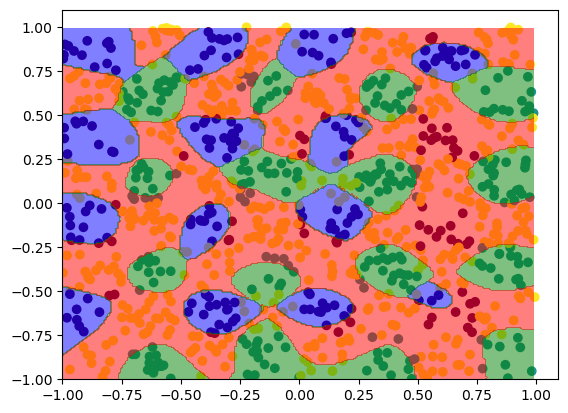

In [10]:
x_min, x_max = -1., 1.
y_min, y_max = -1., 1.
step = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
gridpoints = np.c_[xx.ravel(), yy.ravel()]

output_ptr =  [my_mlp.predict(x, is_classification=True) for x in gridpoints]
output_ptr = np.array(output_ptr)

plt.scatter(X[:, 0], X[:, 1], c=np.argmax(Y, axis=1))

contour = np.argmax(output_ptr, axis=1).reshape(xx.shape)
plt.contourf(xx, yy, contour, levels=[-np.inf, 0.5, 1.5, np.inf], colors=['blue', 'green', 'red'],
             alpha=0.5)

plt.show()

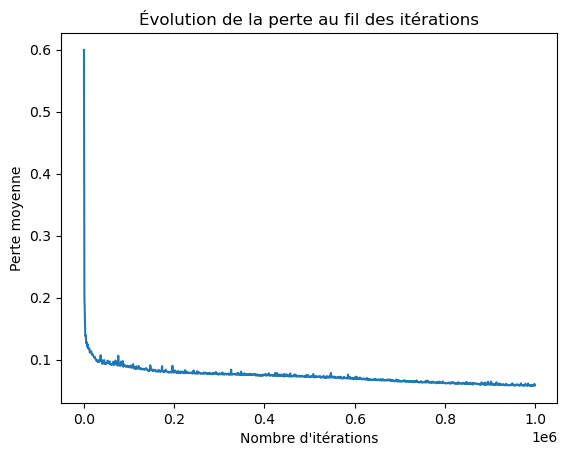

In [11]:
tab =(my_mlp.loss)
plt.plot(range(0, len(tab) * 1000, 1000), tab)  # Utilisez len(tab) pour déterminer la longueur correcte de l'axe x
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Perte moyenne')
plt.title('Évolution de la perte au fil des itérations')
plt.show()